In [1]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from tensorflow import keras
from keras import layers,models
from keras.layers import Dropout
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
x_list = []
y_list = []
x_train = []
y_train = []
x_valid = []
y_valid = []
#test good=> 100 + 2177/5 ,bad=> 12 + 239/3
dir_path = r'D:\\VSCode_files\\Coffee_project\\coffee\\archive\\bite_train_and_test'
img_filenames = os.listdir(dir_path) 

for img_filename in img_filenames:
    img_nparray = np.array(Image.open(f'{dir_path}\\{img_filename}'))
    for i in range(3):
        #img_nparray[i] = preprocessing.normalize(img_nparray[i],norm='l1')
        img_nparray[i] = preprocessing.scale(img_nparray[i])
        
    x_list.append(img_nparray)
    
    if img_filename[0]=='g':
        y_list.append(0)
    else:
        if img_filename[1]=='2':
            y_list.append(2)
        if img_filename[1]=='1':
            y_list.append(1)

y_list = keras.utils.to_categorical(y_list, num_classes=3)
x_train, x_valid, y_train, y_valid = train_test_split(x_list, y_list, random_state=20, stratify=y_list)
# print(np.array(x_train))


In [4]:
from tensorflow.keras.applications import ResNet50
from keras.layers import Dense

def build_model(preModel=ResNet50, num_classes=3):

    pred_model = preModel(include_top=False, weights='imagenet', input_shape=(224,224,3), pooling='max', classifier_activation='softmax')
    output_layer = Dense(num_classes, activation="softmax", name="output_layer")

    model = tf.keras.Model(pred_model.inputs, output_layer(pred_model.output))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

    return model

model = build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

Epoch 1/10
31/31 [==============================] - 291s 9s/step - loss: 2.4329 - accuracy: 0.8741 - val_loss: 1918203.8750 - val_accuracy: 0.5093
Epoch 2/10
31/31 [==============================] - 287s 9s/step - loss: 0.8442 - accuracy: 0.8834 - val_loss: 637648.6875 - val_accuracy: 0.5093
Epoch 3/10
31/31 [==============================] - 282s 9s/step - loss: 0.1532 - accuracy: 0.9432 - val_loss: 16090.3330 - val_accuracy: 0.5093
Epoch 4/10
31/31 [==============================] - 284s 9s/step - loss: 0.0303 - accuracy: 0.9886 - val_loss: 1069.9170 - val_accuracy: 0.5093
Epoch 5/10
31/31 [==============================] - 282s 9s/step - loss: 0.0259 - accuracy: 0.9897 - val_loss: 11.8203 - val_accuracy: 0.5185
Epoch 6/10
31/31 [==============================] - 284s 9s/step - loss: 0.0333 - accuracy: 0.9866 - val_loss: 1.1258 - val_accuracy: 0.7099
Epoch 7/10
31/31 [==============================] - 286s 9s/step - loss: 0.0098 - accuracy: 0.9979 - val_loss: 0.4009 - val_accuracy: 0

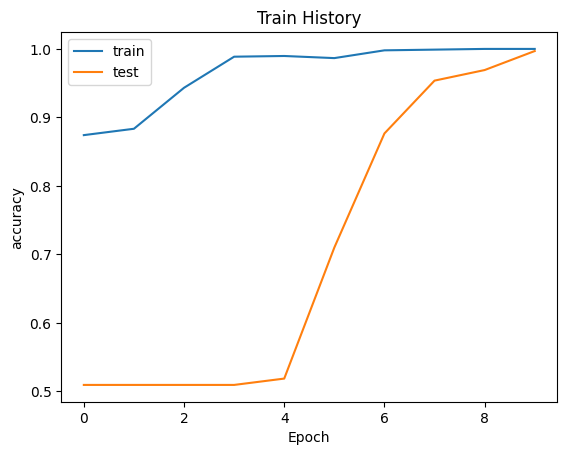

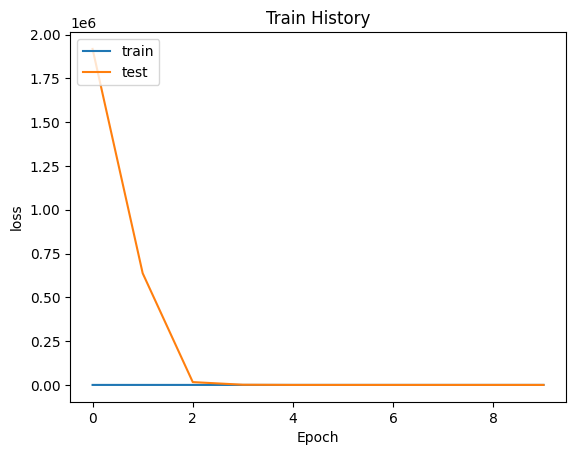

In [5]:
train_history = model.fit(np.array(x_train), np.array(y_train), batch_size=32, epochs=10, verbose=1, validation_data=(np.array(x_valid), np.array(y_valid)))
 
loss, accuracy = model.evaluate(np.array(x_valid), np.array(y_valid), verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')


In [7]:
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics import confusion_matrix,classification_report

classify_type = 3
folderPath = r'D:\VSCode_files\Coffee_project\coffee\archive\bite_val'
filenames = os.listdir(folderPath)

ans_y = []
pred_y = []
for img_filename in filenames:
    img_array = np.expand_dims(np.array(Image.open(f'{folderPath}\\{img_filename}')),axis=0)
    
    if img_filename[0]=='g':
        ans_y.append(0)
    elif img_filename[1]=='2':
        ans_y.append(2)
    elif img_filename[1]=='1':
        ans_y.append(1)

    pred_res = model.predict(img_array, verbose=0)[0]
    for i in range(classify_type):
        if(pred_res[i] == max(pred_res)):
            pred_y.append(i)

print(ans_y)
print(pred_y)

print("confusion_matrix:\n",confusion_matrix(ans_y, pred_y))
print(classification_report(ans_y,pred_y))


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
confusion_matrix:
 [[68  1  4]
 [ 0 35  0]
 [ 0  0 35]]
              precision    recall  f1-score   support

           0       1.00      

In [8]:
model.save('biteRES.h5')